### Creating classes
Create classes and complete the blanks with proper implementation of 'grad' and 'value' functions

In [537]:
from collections import defaultdict
from math import sqrt
import numpy as np
from scipy.stats import norm
from tqdm import tqdm

In [538]:
class Derivative:
    """ Enabling the usage of +, *, -, etc. """
    def __add__(self, other):
        return Add(self, other)
    
    def __radd__(self, other):
        return rAdd(self, other)
    
    def __sub__(self, other):
        return Sub(self, other)

    def __rsub__(self, other):
        return rSub(self, other)
    
    def __mul__(self, other):
        return Mul(self, other)
    
    def __rmul__(self, other):
        return rMul(self, other)
    
    def __truediv__(self, other):
        return Div(self, other)

    def __rtruediv__(self, other):
        return rDiv(self, other)
   
    def Sin(self):
        return Sin(self)
    
    def __pow__(self, power):
        return Pow(self, power)
    
    def Exp(self):
        return Exp(self)
    
    def Cdf(self):
        return Cdf(self)
    
    def __ge__(self, other):
        return Ge(self, other)
    
    def __le__(self, other):
        return Le(self, other)
    
    def __hash__(self):                 # we need this for creating the dictionary with keys as Derivatives object
        return hash(str(self))

Leaf nodes

In [539]:
class Var(Derivative):
    """ A leaf node (a node which doesn't have any child) """
    
    def __init__(self, value):
        self.value = value      # the scalar value of the node

In [540]:
class Ge(Derivative):
    """ >= """
            
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a >= node_b.value
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value >= node_b
        else:      
            self.value = node_a.value >= node_b.value

In [541]:
class Le(Derivative):
    """ <= """

    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a <= node_b.value
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value <= node_b
        else:      
            self.value = node_a.value <= node_b.value

Adding the nodes

In [542]:
class Add(Derivative):
    """ The node that results from adding two nodes """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a + node_b.value
            self.grad = [(node_b, 1)]
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value + node_b
            self.grad = [(node_a, 1)]
        else:      
            self.value = node_a.value + node_b.value    # value of the node
            self.grad = [(node_a, 1), (node_b, 1)]      # partial derivatives of nodes - value 1 for derivative in respect to node_a and 1 for node_b

In [543]:
class rAdd(Derivative):
    """ The node that results from adding two nodes """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a + node_b.value
            self.grad = [(node_b, 1)]
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value + node_b
            self.grad = [(node_a, 1)]
        else:      
            self.value = node_a.value + node_b.value    # value of the node
            self.grad = [(node_a, 1), (node_b, 1)]      # partial derivatives of nodes - value 1 for derivative in respect to node_a and 1 for node_b

Substract the nodes

In [544]:
class Sub(Derivative):
    """ The node that results from subtracting two nodes """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a - node_b.value
            self.grad = [(node_b, -1)]
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value - node_b
            self.grad = [(node_a, 1)]
        else:      
            self.value = node_a.value - node_b.value    # value of the node
            self.grad = [(node_a, 1), (node_b, -1)]     # partial derivatives of nodes - should have again the structure as [(node_a, value), (node_b, value)]

In [545]:
class rSub(Derivative):
    """ The node that results from subtracting two nodes """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a - node_b.value
            self.grad = [(node_b, -1)]
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value - node_b
            self.grad = [(node_a, 1)]
        else:      
            self.value = node_a.value - node_b.value    # value of the node
            self.grad = [(node_a, 1), (node_b, -1)]     # partial derivatives of nodes - should have again the structure as [(node_a, value), (node_b, value)]

Multiplication of nodes

In [546]:
class Mul(Derivative):
    """ The node that results from multiplying two nodes """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float, np.ndarray)): 
            self.value = node_a * node_b.value
            self.grad = [(node_b, node_a)]
        elif isinstance(node_b, (int, float, np.ndarray)): 
            self.value = node_a.value * node_b
            self.grad = [(node_a, node_b)]
        else:      
            self.value = node_a.value * node_b.value
            self.grad = [(node_a, node_b.value), (node_b, node_a.value)]        # f = x*y   df / dx = y   df / dy = x

In [547]:
class rMul(Derivative):
    """ The node that results from multiplying two nodes """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float, np.ndarray)): 
            self.value = node_a * node_b.value
            self.grad = [(node_b, node_a)]
        elif isinstance(node_b, (int, float, np.ndarray)): 
            self.value = node_a.value * node_b
            self.grad = [(node_a, node_b)]
        else:      
            self.value = node_a.value * node_b.value
            self.grad = [(node_a, node_b.value), (node_b, node_a.value)]                                # f = x*y   df / dx = y   df / dy = x

Dividing nodes

In [548]:
class Div(Derivative):
    """ The node that results from dividing one node by another """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a / node_b.value
            self.grad = [(node_b, -node_a/(node_b.value**2))]
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value / node_b
            self.grad = [(node_a, 1/node_b)]
        else:      
            self.value = node_a.value / node_b.value
            self.grad = [(node_a, 1/node_b.value), (node_b, -node_a.value/(node_b.value**2))]           # f = x/y   df / dx = 1/y    df / dy = -x / (y^2)

In [549]:
class rDiv(Derivative):
    """ The node that results from dividing one node by another """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a / node_b.value
            self.grad = [(node_b, -node_a/(node_b.value**2))]
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value / node_b
            self.grad = [(node_a, 1/node_b)]
        else:      
            self.value = node_a.value / node_b.value
            self.grad = [(node_a, 1/node_b.value), (node_b, -node_a.value/(node_b.value**2))]           # f = x/y   df / dx = 1/y    df / dy = -x / (y^2)

Logarithm of one mode

In [550]:
class Log(Derivative):
    """ The node that results from sin(node) """
    
    def __init__(self, node):
        if isinstance(node, (int, float)): 
            self.value = np.log(node) 
            self.grad = [(node, 0)]
        else:
            self.value = np.log(node.value)                          
            self.grad = [(node, 1/node.value)]                 

Sinus of one node

In [551]:
class Sin(Derivative):
    """ The node that results from sin(node) """
    
    def __init__(self, node):
        if isinstance(node, (int, float)): 
            self.value = np.sin(node) 
            self.grad = [(node, 0)]
        else:
            self.value = np.sin(node.value)                          # use np.sin() function
            self.grad = [(node, np.cos(node.value))]                 # only one derivative, since it takes only one node - use np.cos() function

Cosinus of one node

In [552]:
class Cos(Derivative):
    """ The node that results from cos(node) """
    
    def __init__(self, node):
        if isinstance(node, (int, float)): 
            self.value = np.cos(node)
            self.grad = [(node, 0)]
        else:
            self.value = np.cos(node.value)                          
            self.grad = [(node, -np.sin(node.value))]                

Powers

In [553]:
class Pow(Derivative):
    """ The node that results as node ^ power """
    
    def __init__(self, node, power):
        if isinstance(node, (int, float)): 
            self.value = node**power  
            self.grad = [(node, 0)]
        else:
            self.value = node.value**power                                         # reminder of power operation in python: **
            self.grad = [(node, power*node.value**(power-1))]                      # (one derivative)    f = x^n   df/dx = n * x ^ (n-1)

Exponential

In [554]:
class Exp(Derivative):
    """ The node that results from exp(node) """

    def __init__(self, node):
        if isinstance(node, (int, float)): 
            self.value = np.exp(node)  
            self.grad = [(node, 0)]
        else:
            self.value = np.exp(node.value)                         
            self.grad = [(node, np.exp(node.value))]   

In [555]:
class ExpK(Derivative):
    """ The node that results from exp(k*node) """
    
    def __init__(self, node, k):
        if isinstance(node, (int, float)): 
            self.value = np.exp(k * node)  
            self.grad = [(node, 0)]
        else:
            self.value = np.exp(k*node.value)                          
            self.grad = [(node, k*np.exp(k*node.value))]                

Squareroot

In [556]:
class Sqrt(Derivative):
    """ The node that results from sqrt(node) """
 
    def __init__(self, node):
        if isinstance(node, (int, float)): 
            self.value = np.sqrt(node)
            self.grad = [(node, 0)]
        else:
            self.value = np.sqrt(node.value)                  
            self.grad = [(node, 1/(2*np.sqrt(node.value)))]  

$ a^x $

In [557]:
class Pot(Derivative):
    """ The node that results from a ^ node """   
    def __init__(self, a, node):
        self.value = a**node.value                          
        self.grad = [(node, a**node.value * np.log(a))]                

Cdf

In [558]:
class Cdf(Derivative):
    """ The node that results from cdf(node) """

    def __init__(self, node):
        if isinstance(node, (int, float)): 
            self.value = norm.cdf(node) 
            self.grad = [(node, 0)]
        else:
            self.value = norm.cdf(node.value)            
            self.grad = [(node, norm.pdf(node.value))]

### Create a function for getting the gradients values
The algorithm will return a dictionary 'gradients' which will have the nodes as keys and partial derivatives in respect to that nodes as values
so the structure will be e.g.:

gradients = {x1: 1, w1: 14}

We will go through the variable 'stack'. Stack will be a list of tuples (node, deriative).

Let's assume we have such a graph:

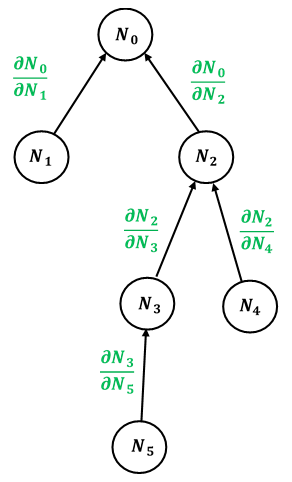

1. First, stack will be assigned with child nodes of the parent node

        stack = N0.grad

        stack = [ (N1,  dN0 / dN1),  (N2,  dN0 / dN2) ]
        

2. We will take the last element from the stack 

        stack = [ (N1,  dN0 / dN1) ]
        
        
    and save it in variables 'node' and 'node_derivative'

        node = N2

        node_derivative = dN0 / dN2
        
    
    then add the node_derivative to the gradients[node]

        gradients[node] = gradients[node] + node_derivative
        
        gradients[N2] = dN0 / dN2
        

3. If 'node' has children nodes, iterate through them AND append them onto a stack with their derivative multiplied by 'node_derivative'

    * child_node = N3,    child_node_derivative = dN2 / dN3

            stack = [ (N1,  dN0 / dN1), (N3, dN2 / dN3 * dN0 / dN2) ]
            
            
    * child_node = N4,    child_node_derivative = dN2 / dN4

            stack = [ (N1,  dN0 / dN1), (N3, dN2 / dN3 * dN0 / dN2), (N4, dN2 / dN4 * dN0 / dN2) ]
            
            
4. Take again last element from the stack and save in 'node' and 'node_derivative' and add 'node_derivative' to gradients[node]

        stack = [ (N1,  dN0 / dN1), (N3, dN2 / dN3 * dN0 / dN2) ]

        node = N4

        node_derivative = dN2 / dN4 * dN0 / dN2

        gradients[N4] = dN2 / dN4 * dN0 / dN2
            

5. N4 has no children, so do nothing

6. Take again last element from the stack - repeat step 4 (fill in the blanks - you'll get better understanding):

        stack = [ (N1,  dN0 / dN1) ]

        node = N3

        node_derivative = dN2 / dN3 * dN0 / dN2

        gradients[N3] = dN2 / dN3 * dN0 / dN2
            

7. Iterate through children of node N3 - repeat step 3:

        * child_node = N5,    child_node_derivative = dN3 / dN5

            stack = [ (N1,  dN0 / dN1), (N5, dN3 / dN5 * dN2 / dN3 * dN0 / dN2) ]
            

8. What will be the next step?

        stack = [ (N1,  dN0 / dN1) ]

        node = N5

        node_derivative = dN3 / dN5 * dN2 / dN3 * dN0 / dN2

        gradients[N5] = dN3 / dN5 * dN2 / dN3 * dN0 / dN2
        
        
9. Does N5 have children? 

        * No

10. What is the next step?

        stack = []

        node = N1

        node_derivative = dN0 / dN1

        gradients[N1] = dN0 / dN1
        
        
11. What is the next step? When do we end?

In [362]:
def Get_Gradient(parent_node):
    """ Go down the graph, and compute derivative of `parent_node` with respect to each node """
    
    # we will create a dictionary 'gradient' which will have the nodes as keys and its derivatives as values
    gradients = defaultdict(lambda: 0)    # initialize the dictionary so when calling a non-existing key the value of 0 is assigned
    
    # stack will represent the list of tuples (node, node_derivative) 
    stack = parent_node.grad.copy()     
    
    while stack:                             # loop for each different branch
        # get node and node_derivative from the top of the stack - function pop()
        temp = stack.pop()                   
        node = temp[0]
        node_derivative = temp[1]            
        # add to the value of derivative of the node (gradients[node]) value node_derivative
        gradients[node] = gradients[node] + node_derivative  
        
        if not isinstance(node, Var):        # if the node has children, put them onto the stack
            # loop for each node in one branch
            for child_node, child_node_derivative in node.grad:                   
                # append child_node and child_node_derivative * node_derivative to the stack
                stack.append((child_node, child_node_derivative * node_derivative))
                
    return dict(gradients)

In [363]:
# ## Printtest

# def Get_Gradient_Print(parent_node):
#     """ Go down the graph, and compute derivative of `parent_node` with respect to each node """
    
#     # we will create a dictionary 'gradient' which will have the nodes as keys and its derivatives as values
#     gradients = defaultdict(lambda: 0)    # initialize the dictionary so when calling a non-existing key the value of 0 is assigned
    
#     # stack will represent the list of tuples (node, node_derivative) 
#     stack = parent_node.grad.copy()     
#     print("Parent: ", parent_node,", Grad: ", parent_node.grad)
    
#     while stack:                             # loop for each different branch
#         # get node and node_derivative from the top of the stack - function pop()
#         temp = stack.pop()                   
#         node = temp[0]
#         node_derivative = temp[1]  
#         print("Type: ", node,", Grad: ", node_derivative)
#         # add to the value of derivative of the node (gradients[node]) value node_derivative
#         gradients[node] = gradients[node] + node_derivative  
        
#         if not isinstance(node, Var):        # if the node has children, put them onto the stack
#             # loop for each node in one branch
#             for child_node, child_node_derivative in node.grad:                   
#                 # append child_node and child_node_derivative * node_derivative to the stack
#                 stack.append((child_node, child_node_derivative * node_derivative))
#                 print("Child-type: ", child_node,", Grad: ", child_node_derivative)
                
#     return dict(gradients)

### Test the function
#### 1. Example

$$ f(x_1, x_2, x_3) = \sin(x_2 + {x_1}^2) \frac{x_3 - x_1}{x_2} $$

$$ \frac{\partial f}{\partial x_1} = \sin(x_2 + {x_1}^2) (- \frac{1}{x_2}) + \frac{x_3-x_1}{x_2} \cos(x_2 + {x_1}^2) 2x_1 $$

In [364]:
def f(x1, x2, x3):
    if type(x1) == int:                                           # check if type of arguments (any argument) is int - then return the equation with np.sin, otherwise Sin
        return np.sin(x2 + x1**2) * ((x3 - x1) / x2)
    return Sin(x2 + x1**2) * ((x3 - x1) / x2)

def part_f_x1(x1, x2, x3):
    return np.sin(x2 + x1**2) * (-1 / x2) + ((x3 - x1)/x2 * np.cos(x2 + x1**2) * 2 * x1)

def part_f_x2(x1, x2, x3):
    return (1/x2)*(x3-x1)*np.cos(x2+x1**2)-(1/x2**2)*(x3-x1)*np.sin(x2+x1**2)

def part_f_x3(x1, x2, x3):
    return (1/x2)*np.sin(x2+x1**2)

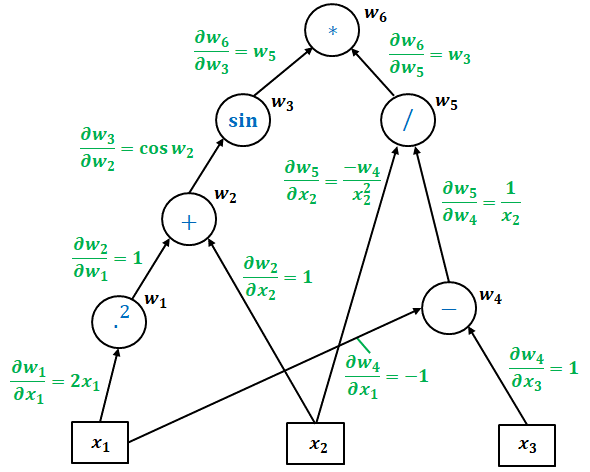

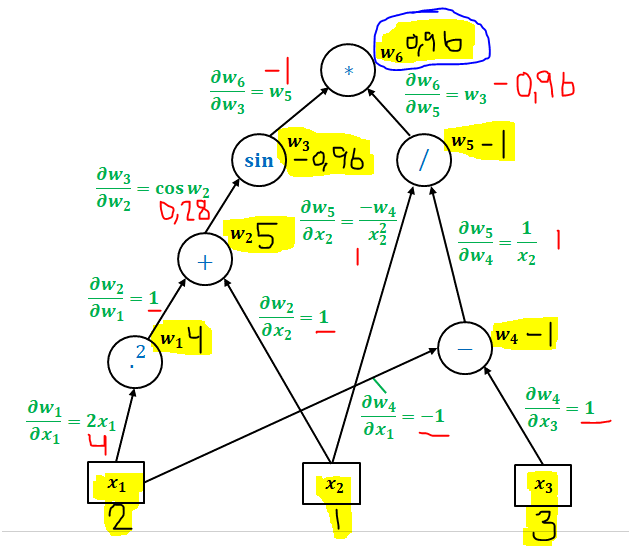

In [365]:
# assign the values
x1_val = 2
x2_val = 1
x3_val = 3

In [366]:
x1 = Var(x1_val)
x2 = Var(x2_val)
x3 = Var(x3_val)

y = f(x1, x2, x3)
gradients = Get_Gradient(y)

print('Value of f equals', y.value)
print('The partial derivative of y with respect to x1 =', gradients[x1])
print('The partial derivative of y with respect to x2 =', gradients[x2])
print('The partial derivative of y with respect to x3 =', gradients[x3])

Value of f equals -0.9589242746631385
The partial derivative of y with respect to x1 = 2.0935730165160438
The partial derivative of y with respect to x2 = 1.2425864601263648
The partial derivative of y with respect to x3 = -0.9589242746631385


In [367]:
print('[Manual way] Value of f equals', f(x1_val, x2_val, x3_val))
print('[Manual way] Value of partial derivative of f with respect to x1 equals', part_f_x1(x1_val, x2_val, x3_val))
print('[Manual way] Value of partial derivative of f with respect to x2 equals', part_f_x2(x1_val, x2_val, x3_val))
print('[Manual way] Value of partial derivative of f with respect to x3 equals', part_f_x3(x1_val, x2_val, x3_val))

[Manual way] Value of f equals -0.9589242746631385
[Manual way] Value of partial derivative of f with respect to x1 equals 2.0935730165160438
[Manual way] Value of partial derivative of f with respect to x2 equals 1.2425864601263648
[Manual way] Value of partial derivative of f with respect to x3 equals -0.9589242746631385


## Test: Black-Scholes

In [368]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import style 
style.use('ggplot')
from scipy.stats import norm
import scipy

In [436]:
def euro_call(S0, K, T, r, sigma):
    d1 = (Log(S0/K)+(r+1/2*(sigma**2))*T)/(sigma*Sqrt(T))
    d2 = d1 - sigma*Sqrt(T)
    return S0 * Cdf(d1)  - K * Exp((-1)*r * T) * Cdf(d2)

In [495]:
S0_val = 100
K_val = 100
T_val = 1
r_val = 0.07
sigma_val = 0.2
n_simulations = 1000
n_steps = 252

In [496]:
S0 = Var(S0_val)
K = Var(K_val)
T = Var(T_val)
r = Var(r_val)
sigma = Var(sigma_val)

y = euro_call(S0, K, T, r, sigma)
gradients = Get_Gradient(y)

print('Value of f equals', y.value)
print('The partial derivative of y with respect to S0 =', gradients[S0])
print('The partial derivative of y with respect to K =', gradients[K])
print('The partial derivative of y with respect to T =', gradients[T])
print('The partial derivative of y with respect to r =', gradients[r])
print('The partial derivative of y with respect to sigma =', gradients[sigma])

Value of f equals 11.541470170672412
The partial derivative of y with respect to S0 = 0.6736447797120796
The partial derivative of y with respect to K = -0.5582300780053555
The partial derivative of y with respect to T = 7.512880170653974
The partial derivative of y with respect to r = 55.82300780053558
The partial derivative of y with respect to sigma = 36.05269624616482


In [559]:
K_val = 100
T_val = 1
r_val = 0.07
n_simulations = 1000
n_steps = 252
S0_val = 100
sigma_val = 0.2

K = Var(K_val)
T = Var(T_val)
r = Var(r_val)
S0 = Var(S0_val)
sigma = Var(sigma_val)

In [560]:
#S0 = 100
#K = 90
#mu = 0.09
#sigma = 0.5
#n_simulations = 1000
timeline = np.array([1])
dt = np.diff(timeline,prepend =0)
Z = np.random.normal (0 , 1 , size = (n_simulations , len(timeline)))
len(Z[0,:])
#d1 = mu - (sigma **2) / 2
#d2 = d1 * dt + sigma * np.sqrt (dt) * Z

#S = np.hstack ([S0 * np.ones(( n_simulations , 1) ) , np.exp ( d2 ) ]).cumprod ( axis = 1)

1

In [561]:
def Price_European_Option(S0, K, T, r, sigma, Z):
    d1 = r - (sigma**2) / 2
    d2 = d1 * T + sigma * Sqrt(T) * Z 
    S0 = S0 * Exp(d2)
    if ((S0 - K).value >=0) == True:
        
        return (S0 - K) * Exp( -(1)* r * T )
    else:
        
        return (S0 - K) * 0 * Exp( -(1)* r * T )


In [530]:
gs = []
gk = []
gt = []
gr = []
gsigma=[]
for i in tqdm(Z[:,0]):
    y = Price_European_Option(S0, K, T, r,sigma, i)
    gradients = Get_Gradient(y)
    gs.append(gradients[S0])
    gk.append(gradients[K])
    gt.append(gradients[T]) 
    gr.append(gradients[r])
    gsigma.append(gradients[sigma])

#print('Value of f equals', y.value)
print('The partial derivative of y with respect to S0 =', (0.6736537927736208-np.mean(gs)))
print('The partial derivative of y with respect to K =', (-0.5582210648285013-np.mean(gk)))
print('The partial derivative of y with respect to T =', (7.511817785889718-np.mean(gt)))
print('The partial derivative of y with respect to r =', (55.88513957093966-np.mean(gr)))
print('The partial derivative of y with respect to sigma =', (36.06278151150377 - np.mean(gsigma)))






  0%|          | 0/1000 [00:00<?, ?it/s]




100%|██████████| 1000/1000 [00:00<00:00, 7239.35it/s][A

The partial derivative of y with respect to S0 = 0.020041177518113518
The partial derivative of y with respect to K = -0.016500255463145264
The partial derivative of y with respect to T = 0.25160270026442966
The partial derivative of y with respect to r = 1.7130586344040708
The partial derivative of y with respect to sigma = 1.3810873108258122


### Asiatisk AAD Test

In [565]:
K_val = 100
T_val = 1
r_val = 0.07
n_simulations = 10
n_steps = 252
S0_val = 100
sigma_val = 0.2

K = Var(K_val)
T = Var(T_val)
r = Var(r_val)
S0 = Var(S0_val)
sigma = Var(sigma_val)

In [569]:
timeline = np.arange(0, 1, 1/252)      
Z = np.random.normal (0 , 1 , size = (n_simulations , len(timeline)))

In [588]:

def Price_Asian_Option(S0, K, T, r, sigma, Z,j):
    dt = T/n_steps
    d1 = r - (sigma**2) / 2
    F = S0
    temp = 0
    p = 0
    temp1= 0
    
    for i in range(0,n_steps):
        p += F
        print(p.value)
        d2 = d1 * dt + sigma * Sqrt(dt) * Z[j,i]
        temp = F * Exp(d2)
        F = temp
    S0 = p / n_steps
    
    if ((S0 - K).value >=0) == True: 

        return (S0 - K) * Exp( -(1)* r * T )
    else:

        return (S0 - K) * 0 * Exp( -(1)* r * T )
   

In [589]:
gs = []
gk = []
gt = []
gr = []
gsigma=[]
v=[]

for j in tqdm(range(0,n_simulations)):
    S0_val = 100
    S0 = Var(S0_val)
    y = Price_Asian_Option(S0, K, T, r, sigma, Z, j)
    v.append(y.value)
    gradients = Get_Gradient(y)
    gs.append(gradients[S0])
    gk.append(gradients[K])
    gt.append(gradients[T]) 
    gr.append(gradients[r])
    gsigma.append(gradients[sigma])

print('Value of f equals', np.mean(v))
print('The partial derivative of y with respect to S0 =', np.mean(gs))
print('The partial derivative of y with respect to K =', np.mean(gk))
print('The partial derivative of y with respect to T =', np.mean(gt))
print('The partial derivative of y with respect to r =', np.mean(gr))
print('The partial derivative of y with respect to sigma =', np.mean(gsigma))







  0%|          | 0/10 [00:00<?, ?it/s]

100
202.73313323399753
304.21806559176594
406.0571813203736
509.68827412558653
613.2510619528493
716.0599084313752
815.2899002744654
914.7265700098772
1014.5330749972363
1115.0253433726762
1215.9129987365627
1315.8604627292436
1415.2812865166823
1514.1114691939617
1611.9560813425705
1708.301298462217
1803.3217352272918
1898.558156304989
1993.8276203398395
2088.95155065477
2183.075818981794
2277.7580800626138
2371.753288022567
2466.2668788555566
2559.0852128564106
2651.851457863375
2745.1280767573307
2837.8404438266434
2928.668544729106
3019.3935329175715
3108.8108080495845
3197.244742590791
3288.598679412195
3379.0731247875547
3469.515875877077
3560.023956784793
3652.653653333837
3745.160161368034
3838.8518310761924
3932.228017796431
4025.2622080043147
4119.776330675317
4215.178358723914
4310.165414741672
4405.060908763121
4501.1433972397635
4597.50004442684
4692.346768662097
4786.0464729374
4881.65835666973
4977.6512829802205
5074.588295795524
5172.4519094418965
5270.489668044548
5368







 10%|█         | 1/10 [00:01<00:11,  1.26s/it]

100
201.31837581341114
301.99845258586873
404.894882820191
510.41206773344175
615.4432326169609
718.6747473278925
822.3630507742238
924.9287661842313
1026.6978725798197
1129.6351383183737
1233.0698326984461
1333.025533400977
1431.6987957545434
1527.4871725818398
1624.9677700747068
1723.7335167909894
1822.1242120003803
1920.7987296288668
2020.24446377013
2119.5155481017505
2217.974970605526
2313.610789246093
2408.233939457045
2504.2897941227557
2599.3796874838567
2694.6519412770776
2788.731130472792
2882.178301841116
2973.471878965854
3064.9669880997017
3155.7369837071024
3245.486962069919
3334.3901637781396
3423.383706796944
3513.2489143808343
3602.7247862589456
3694.029021602443
3786.7819006189857
3880.048099672181
3972.5860256592982
4065.4426713745115
4157.92791583239
4250.280207814198
4344.2150072072
4438.334811443029
4533.353501334521
4628.596285117771
4722.952339167121
4817.287951000001
4909.661315337813
5004.386740588152
5099.178344649677
5196.062202433913
5291.837708479657
5390.







 20%|██        | 2/10 [00:02<00:10,  1.30s/it]

100
200.6383329221621
300.53236851711034
400.8063013679869
503.4688253166492
606.4651963214262
710.8172269165384
814.8208568052513
920.4679274292022
1026.1025446672743
1131.467589471071
1236.818095757018
1344.9499704724205
1452.0899625568652
1558.0259143181725
1662.683838490565
1768.074961016223
1874.0575470373492
1981.853916639975
2090.2530446220867
2198.745173436717
2307.3731528197272
2415.5012779513454
2524.1064985790317
2633.7441857385284
2743.3937836817204
2850.968596537541
2959.7873166840363
3068.431251433238
3177.712450543565
3288.9305240372514
3399.6476389668683
3510.000137207226
3619.7816589159024
3729.3581706290984
3835.759736151003
3943.1623091652764
4051.6138458405712
4161.172273126724
4270.719593955114
4381.894795625799
4491.916393011638
4600.806555987996
4710.989861650396
4822.707308608456
4935.3653803295
5047.500512228243
5159.990138462382
5272.676762486079
5387.632010553012
5503.137938275518
5619.404180603501
5734.549328043511
5849.578511936051
5964.575080425675
6079.54







 30%|███       | 3/10 [00:03<00:08,  1.28s/it]

100
198.81444971944586
298.7850656768728
398.36508126905176
496.8268006820493
597.5216436611539
697.8586457723916
798.3976783249155
897.601561134383
996.2190968365974
1093.4800261930604
1193.0764297693772
1292.1707337127327
1390.8888370141285
1488.7352047233794
1587.6825540915038
1686.8057069705028
1785.0091641063777
1884.8556812346346
1984.7707499701569
2086.5350036343657
2186.2431361822555
2284.6222120815073
2382.907588956237
2478.259217087641
2571.6946066704672
2664.50845286957
2756.69581721284
2848.133877316587
2940.5358350351667
3032.4850840105737
3123.2699811382427
3213.2861553605644
3302.779589566786
3391.582501757069
3481.333560316036
3570.963092483729
3660.0051068283606
3748.8253407384823
3838.8818177096528
3928.9465977351256
4019.179837818818
4109.128303301286
4200.250918879627
4292.0343334031695
4386.961104845763
4480.50493900797
4573.185083300896
4664.690022216983
4757.726547959292
4850.460682371552
4943.678241056452
5039.672315539518
5134.99137224691
5231.8630125663185
532







 40%|████      | 4/10 [00:05<00:07,  1.24s/it]

100
199.69094432387274
299.25646563151463
397.0967925785121
494.4093285198353
594.6046439310378
693.6531617350417
790.8940775304784
886.250876712323
981.4558728833902
1074.8905129268699
1167.9515116920086
1260.849182316019
1356.1539706019128
1449.8101558421604
1544.1545290874933
1636.531986018697
1729.24390359492
1823.048229680973
1918.7009295239095
2013.4509321233263
2108.204863507973
2202.729646099426
2297.17446649729
2389.9913818035975
2482.7587424118733
2572.72880237982
2663.9451936958703
2755.2672477222923
2847.963468557247
2941.3149799019807
3034.470869239279
3128.7104310554823
3221.347889815852
3314.5248319151415
3404.4650147582
3495.1793537600715
3585.6487016311353
3675.1836172857525
3763.483391799842
3852.8878533957654
3943.5417354047636
4034.448983575343
4124.403844112524
4213.391186931958
4303.814728950573
4394.166054749612
4485.312685924905
4575.486137500354
4664.238684430521
4752.50047920439
4841.665866795212
4928.626663276241
5015.690365091358
5101.988387850818
5188.30619







 50%|█████     | 5/10 [00:06<00:06,  1.26s/it]

100
200.74339996857913
300.7056015933256
398.5571617665643
496.14541017884017
595.6555881207306
693.4275374723849
790.7878675041869
889.8710250903973
989.4082275488436
1089.1537817502617
1191.2171226294492
1294.3378651634246
1397.1105738294712
1499.3216046040284
1598.7719348860214
1697.2073401779146
1796.388801815079
1895.850536890102
1997.6469699595557
2099.233508168113
2203.0980584533318
2308.7627355233253
2412.281317793923
2514.4172627009366
2617.612531385095
2721.4185693321674
2823.551217899842
2927.2563162160764
3031.7346541042525
3138.940517133079
3247.3836132023744
3354.7059395005804
3459.9349331701987
3565.812667703021
3670.6078596389484
3777.091103109772
3884.952700421758
3990.9919140642405
4096.399392129217
4201.401379848451
4305.515801520932
4409.8839872676135
4515.347041880815
4620.376617854556
4725.829861079821
4832.246945122849
4938.132536971912
5043.669672745949
5148.136904721062
5252.191657764454
5357.065214739462
5461.30834797916
5566.024276970898
5671.733955228273
577







 60%|██████    | 6/10 [00:07<00:04,  1.24s/it]

100
202.80946001074597
306.03279251092806
406.3021615348746
507.1012707899802
608.4264039749312
709.9391034857792
809.5594090937483
909.5844146313962
1011.2167977021585
1112.7228617864707
1213.466745472641
1314.647983637823
1416.2841549382356
1517.5553160837694
1619.8641408185806
1721.5720695985729
1822.932664811775
1925.2206940711706
2028.3424762343618
2132.2484552264104
2235.953786470307
2339.2933985786876
2443.373379300991
2548.2201590502095
2654.4539219913786
2760.7347590977656
2864.963076259387
2968.4065748456196
3073.035461527218
3176.765862294001
3281.075919599391
3385.469666105238
3490.7445835933527
3596.377752711907
3704.226961939269
3812.173427667222
3921.3642088439597
4032.4160813712206
4143.935688659769
4254.604469504768
4365.087085988833
4474.593123062819
4588.023066415223
4699.955502941604
4810.573200874223
4920.210405926481
5028.227021081211
5135.261186193656
5243.73700440314
5350.708967806852
5458.7151405312525
5567.050301997442
5675.040979914521
5783.364461512727
5893.







 70%|███████   | 7/10 [00:08<00:03,  1.21s/it]

100
198.7803335027406
297.6269406564295
395.209140397589
494.56905169159165
592.3729916333575
691.578083429939
788.996687852304
885.4619573334462
983.3872084262508
1080.4582805955304
1178.0423617211427
1275.3619804629855
1370.7462612496695
1464.9316500415357
1556.5612959426608
1646.714322604899
1734.3946679619926
1823.0982509569317
1912.2306691605045
1999.32622348556
2086.087733370571
2172.7333365398763
2258.229099253332
2341.662399707974
2425.410057274393
2509.4429505057105
2593.321410974618
2678.030299794503
2760.981961039169
2845.054420832346
2930.9462646990055
3017.5041345550526
3104.497951899559
3192.670392549411
3280.474363156812
3369.81653418815
3460.1119262181146
3549.695969651592
3638.3632808849884
3726.643755336894
3816.104069560735
3903.8080314119393
3991.944259291716
4080.0391458350973
4169.640587257477
4257.295502447586
4343.992969974078
4430.808297270265
4517.990532202652
4604.109615225864
4689.6803689189655
4774.698525526151
4859.138923364631
4943.490519402682
5027.95638







 80%|████████  | 8/10 [00:09<00:02,  1.19s/it]

100
200.69543834561273
302.9169214214059
403.482960666399
507.2683056024173
610.5190745421581
713.9530641106971
818.0318949262731
922.1577066285008
1028.8150319808303
1137.1300845842898
1247.387810670358
1354.9317240461646
1460.6518064468835
1567.3821087533945
1672.118385597549
1778.4809938560657
1886.8003995095892
1995.3580822674458
2104.0976495277578
2212.4603041172245
2321.8698941027887
2432.974697778828
2545.475691496547
2655.512796224465
2764.4228119850463
2871.3219595943146
2977.0220107967107
3081.6193408810545
3187.9321467589925
3293.640149993616
3398.8073583663127
3503.4893500451403
3608.560093640627
3714.040795837378
3817.98875985408
3919.364609022588
4022.0049037247795
4126.067249515519
4228.383873970055
4330.849394103195
4435.830507487145
4541.696867528023
4646.013427538992
4751.982433643747
4859.58303352615
4965.036859036993
5072.218451190988
5180.037866271086
5288.393567019558
5396.408257390268
5505.845721229436
5613.9677810761905
5721.811321578075
5827.458405027075
5930.0







 90%|█████████ | 9/10 [00:11<00:01,  1.22s/it]

100
199.7045376116968
297.73256769230386
395.4341864169527
493.8614163871159
591.3456551020279
690.3812315264726
791.1823308207184
889.9193247556271
988.1715161874945
1085.4570720462175
1181.7965682555619
1279.8884826584588
1377.6943574304748
1473.1248907710917
1567.669435311369
1662.4131483374256
1758.5284768271822
1853.3187849036012
1948.8760645991072
2043.1114088766371
2137.319621621869
2230.9485848036848
2324.9286942498425
2418.8712600464582
2514.0089439968856
2609.0647006970808
2702.353491250128
2796.0023435849967
2891.107034776522
2985.8628512641653
3080.120183004114
3174.5974451043185
3269.514202693047
3364.5162190225537
3459.5521849215943
3554.3045008644667
3649.5200076626006
3743.6662007969608
3837.5947818201525
3929.984114493458
4023.838822530291
4117.53518383299
4211.547333858966
4305.526230502675
4398.705431549389
4492.612287917812
4590.10115893261
4691.356646900977
4792.249777969929
4893.016316169467
4993.544306256026
5092.725196427463
5193.155586586634
5291.95596193626
53







100%|██████████| 10/10 [00:12<00:00,  1.24s/it]

Value of f equals 7.538739564367086
The partial derivative of y with respect to S0 = 0.728063069577835
The partial derivative of y with respect to K = -0.6526756739341639
The partial derivative of y with respect to T = 4.633221428590938
The partial derivative of y with respect to r = 30.24765651267764
The partial derivative of y with respect to sigma = 25.158854727033763


In [481]:
def BS_Price_Asian_Options(S0, K, T, r, sigma): 
    sigma_G = sigma / Sqrt(3)
    b = (0.5) * (r - (0.5)*(sigma_G**2))
    d1 = (Log(S0 / K) + (b + 0.5 * (sigma_G**2) ) * T)/ (sigma_G * Sqrt(T))
    d2 = d1 - sigma_G*Sqrt(T)

    asian_call = S0 * Exp( (b - r) * T) * Cdf(d1) - K * Exp (-(1) * r * T) * Cdf(d2)
    
    return asian_call

$C_G = S_0 e^{(b-r)T} \Phi(d_1) - K e^{-rT}\Phi(d_2)$

$\sigma_G = \frac{\sigma}{\sqrt{3}}$

$b = \frac{1}{2}(r-\frac{1}{2} \sigma_G^2)$

$d_1 = \frac{log(\frac{S_0}{K})+(b+\frac{1}{2}\sigma_G^2)T}{\sigma_G\sqrt{T}}$

$d_2 = d_1 - \sigma_G \sqrt{T}$

In [536]:
a = 3

In [465]:
def BS_Price_Asian_Options(S0, K, T, r, sigma):
    
    b = (1/2) * (r - (1/2) * ((sigma / S)**2))
    
    d1 = (Log(S0 / K) + (b + (1/2) * ((sigma / Sqrt(3))**2) ) * T)/ ((sigma / 1.7320508075688772) * Sqrt(T))
    
    d2 = d1 - (sigma / 1.7320508075688772)*Sqrt(T)
    
    return S0 * Exp((b - r) * T) * Cdf(d1) - K * Exp(-(1) * r * T) * Cdf(d2)

In [466]:
S0_val = 100
K_val = 100
T_val = 1
r_val = 0.07
sigma_val = 0.2

In [467]:
S0 = Var(S0_val)
K = Var(K_val)
T = Var(T_val)
r = Var(r_val)
sigma = Var(sigma_val)

y = BS_Price_Asian_Options(S0, K, T, r, sigma)

gradients = Get_Gradient(y)

print('Value of f equals', y.value)
print('The partial derivative of y with respect to S0 =', gradients[S0])
print('The partial derivative of y with respect to K =', gradients[K])
print('The partial derivative of y with respect to T =', gradients[T])
print('The partial derivative of y with respect to r =', gradients[r])
print('The partial derivative of y with respect to sigma =', gradients[sigma])

Value of f equals 6.024544283554853
The partial derivative of y with respect to S0 = 0.6063517314661314
The partial derivative of y with respect to K = -0.546106288630583
The partial derivative of y with respect to T = 3.596224538143864
The partial derivative of y with respect to r = 24.29304228975174
The partial derivative of y with respect to sigma = 18.95711577861243
